In [1]:
from dotenv import load_dotenv
import sys
import os
from IPython.display import Image, display
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage
load_dotenv(override=True)

True

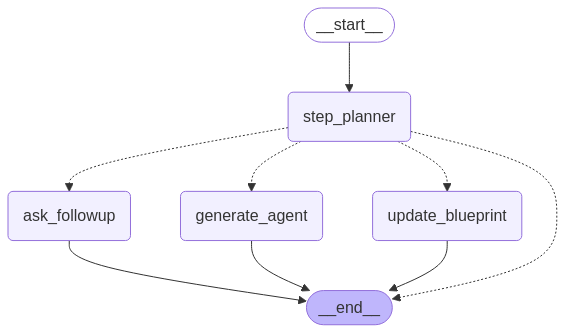

In [2]:


from agents_forge.core_agent.agent import generate_core_agent

agent = await generate_core_agent()

display(Image(agent.get_graph().draw_mermaid_png()))
config = {"configurable": {"thread_id": "10"}}


In [3]:

res = await agent.ainvoke(
    {
        "messages": 
            [HumanMessage(content="czesc, zbuduj agenta ktory bedzie robic research na temat AI na zadanych stronach www dla tech leada. chce konkretne wskazowki zeby sie cialge rozwijac. interesuje mnie glownie praktyczna wiedza i wskazowki przy implementacji. zaproponuj agenta. o nic nie dopytuj")]},
    config
    )

In [6]:
print(res["messages"][-1])

content="Based on your request, I have enough information to proceed with creating the agent. It will focus on conducting research on AI across various websites, utilizing a mix of academic sources and industry blogs to provide practical knowledge and implementation tips. \n\nI will design the agent to perform the following actions:\n\n1. Identify relevant websites for AI research.\n2. Extract key information and insights from the content.\n3. Summarize findings into actionable recommendations.\n4. Present the information in a clear and organized manner.\n\nLet's move forward with the agent creation!" additional_kwargs={} response_metadata={} id='37f1f805-ea24-40c9-85ec-703eef2e3d81'


In [7]:
res = await agent.ainvoke({"messages": [HumanMessage(content="""
generate
""")]}, config)

In [ ]:
type(agent.get_state(config).values["agent_config"])

In [8]:
from pprint import pprint

# Get the state snapshot
state_snapshot = agent.get_state(config)

# Format and print the state in a more readable way
state_dict = {
    "messages": [
        {
            "type": type(msg).__name__,
            "content": msg.content
        } for msg in state_snapshot.values['messages']
    ],
    "planned_step": state_snapshot.values.get('planned_step', 'N/A'),
    "thread_id": state_snapshot.metadata['thread_id'],
    "step": state_snapshot.metadata['step']
}

# Safely add agent_blueprint if it exists (checking both spellings)
if 'agent_bleuprint' in state_snapshot.values:
    state_dict["agent_blueprint"] = state_snapshot.values['agent_bleuprint']
elif 'agent_blueprint' in state_snapshot.values:
    state_dict["agent_blueprint"] = state_snapshot.values['agent_blueprint']
else:
    state_dict["agent_blueprint"] = "Not available"

pprint(state_dict)

{'agent_blueprint': 'Not available',
 'messages': [{'content': 'czesc, zbuduj agenta ktory bedzie robic research na '
                          'temat AI na zadanych stronach www dla tech leada. '
                          'chce konkretne wskazowki zeby sie cialge rozwijac. '
                          'interesuje mnie glownie praktyczna wiedza i '
                          'wskazowki przy implementacji. zaproponuj agenta. o '
                          'nic nie dopytuj',
               'type': 'HumanMessage'},
              {'content': 'To create an effective agent for researching AI on '
                          'specified websites, I need to clarify the types of '
                          'websites you want the agent to focus on. Could you '
                          'specify whether you prefer academic sources, '
                          'industry blogs, or a mix of both? This will help '
                          "tailor the agent's research capabilities.",
               'type':

In [9]:
import json
from pathlib import Path

# Pobierz stan agenta
state_snapshot = agent.get_state(config)

# Pobierz obiekt agent_config
agent_config = state_snapshot.values.get('agent_config')

# Ścieżka do pliku
output_file = Path("agent_config.json")

# Sposób dla klas Pydantic
try:
    # Dla nowszych wersji Pydantic (v2+)
    json_data = agent_config.model_dump()
    with open(output_file, 'w', encoding='utf-8') as f:
        json.dump(json_data, f, indent=4)
    print(f"Zapisano konfigurację do {output_file}")
except AttributeError:
    try:
        # Dla starszych wersji Pydantic (v1)
        json_data = agent_config.dict()
        with open(output_file, 'w', encoding='utf-8') as f:
            json.dump(json_data, f, indent=4)
        print(f"Zapisano konfigurację do {output_file}")
    except AttributeError:
        print("Obiekt agent_config nie jest klasą Pydantic. Spróbuj metody 2.")

Zapisano konfigurację do agent_config.json


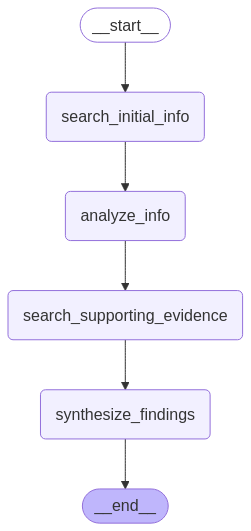

In [10]:
from agents_forge.agents_generation.generator import generate_agent_from_config
import json
# Wczytaj konfigurację agenta z pliku JSON

with open("agent_config.json", "r", encoding="utf-8") as f:
    agent_config_data = json.load(f)

# Zaimportuj klasę AgentConfig do walidacji
from agents_forge.agents_generation.config_schema import AgentConfig

# Przekształć dane JSON na obiekt AgentConfig
agent_config = AgentConfig.model_validate(agent_config_data)


agent_2 = await generate_agent_from_config(agent_config)
display(Image(agent_2.get_graph().draw_mermaid_png()))



In [11]:
result = await agent_2.ainvoke({"messages": [HumanMessage(content="do research on best langgraph practices")]})



[search_initial_info] performing web search with query: search_query='best practices for LangGraph usage and implementation'
[analyze_info] querying LLM with prompt: Analyze the gathered information and identify key points. + Found the following information: <Document href="https://medium.com/@kacperwlodarczyk/advanced-multi-agent-development-with-langgraph-expert-guide-best-practices-2025-4067b9cec634"/>
⚡Advanced Multi-Agent Development with Langgraph: Expert Guide & Best Practices 2025 | by Kacperwlodarczyk | Jan, 2025 | Medium ⚡Advanced Multi-Agent Development with Langgraph: Expert Guide & Best Practices 2025 What are Multi-agent Systems Multi-agent systems (MAS) represent a paradigm shift in artificial intelligence applications, where multiple AI agents collaborate to solve complex tasks. In the context of Langgraph, a multi-agent system consists of specialized agents operating as graph nodes, each handling distinct aspects of a larger task. Why use Langgraph for Multi-agent Syst

In [12]:
result

{'messages': [HumanMessage(content='do research on best langgraph practices', additional_kwargs={}, response_metadata={}, id='b1eaa582-f0ef-4bc0-9fd8-07d10538f8b1'),
  AIMessage(content='Found the following information: <Document href="https://medium.com/@kacperwlodarczyk/advanced-multi-agent-development-with-langgraph-expert-guide-best-practices-2025-4067b9cec634"/>\n⚡Advanced Multi-Agent Development with Langgraph: Expert Guide & Best Practices 2025 | by Kacperwlodarczyk | Jan, 2025 | Medium ⚡Advanced Multi-Agent Development with Langgraph: Expert Guide & Best Practices 2025 What are Multi-agent Systems Multi-agent systems (MAS) represent a paradigm shift in artificial intelligence applications, where multiple AI agents collaborate to solve complex tasks. In the context of Langgraph, a multi-agent system consists of specialized agents operating as graph nodes, each handling distinct aspects of a larger task. Why use Langgraph for Multi-agent Systems Langgraph provides several compell